# SOCIETE 

In [126]:
import numpy as np
import random

def tableauBase(P):
    """les O sont les batiments pauvres et 1 les batiments riches."""
    tableau_de_zero_un = np.zeros((20,20), dtype='i')
    for i in range(len(tableau_de_zero_un)):
        for j in range(len(tableau_de_zero_un)):
            if random.random() < P :
                tableau_de_zero_un[i,j] = 1
    #print("\n\n\t\t VILLE BASIQUE\n\n\n")
    #print(tableau_de_zero_un)
    return tableau_de_zero_un
    
tab_base = tableauBase(0.5)

*** Dans la premiere matrice on place les riches(modélisé à 1) et les pauvres (modélisé à 0) selon la probabilités que nous donnons ***

*** la deuxieme matrice represente la creation de gang dû à la présence d'un " carré"(de -1) de 4 "batiments" de pauvres.***

In [127]:

import numpy as np

def creationDeGang(tab):
    """H: nous voulons savoir si un carré crée un groupe de gang (nommé 3)"""
    tableau = tab.copy()
    for i in range(len(tableau)) :
        for j in range(len(tableau)) :
            if  i+1 < len(tableau) and i-1 >= 0 and  j+1 < len(tableau) and j-1 >= 0:
                 if tableau[i,j] == 0 and tableau[i+1,j]==0  and tableau[i,j+1]==0 and tableau[i+1,j+1]==0 :
                    tableau[i,j] = -1
                    tableau[i+1,j]=-1 
                    tableau[i,j+1]=-1
                    tableau[i+1,j+1]=-1           
    #print("\n\n\t\t VILLE AVEC GANG\n\n\n")
    #print(tableau)
    return tableau

#tab_G =creationDeGang(tab_base)

***les carrés de violet seront les gangs crée ,je 1 est en jaune et en bleu le 0***

***On remarque que il y a des gangs qui se crée peu a peu dû à la grande présence de 0 (de pauvreté)***

In [128]:
import matplotlib.pyplot as plt
# Display matrix
#plt.matshow(tab_base)
#plt.matshow(tab_G)
#plt.show()



    *** 11/03 : création de programmes qui calcule la moyenne de l'entourage d'un 1 ou 0 (fait par urbain) ,creation de la list qui enregistre ceux qui on un bon ou un mauvais entourage et modifie  la matrice en conditionset presente le tout (danny) ,recherche documentale qui permettra de faire le parallele entre les  programmes utilisé  ***

In [129]:
def voisins(tab, rowNumber, columnNumber):
    '''
    Petite fonction pour récupérer les voisins
    '''
    N = []
    for i in range(rowNumber-1, rowNumber+2):
        for j in range(columnNumber-1, columnNumber+2):
            if  (i >= 0 and i < tab.shape[0]) and (j >= 0 and j < tab.shape[1]) and ((i,j)!=(rowNumber,columnNumber)):
                N.append(tab[i,j])
    return N


In [130]:
def moyenne_voisins(tab,i,j):
    '''
    Calcul de la moyenne des valeurs voisinnes
    '''
    N = voisins(tab,i,j)
    return sum(N)/len(N)
    
moyenne_voisins(tab_base,6,4)

0.75

In [131]:
def Ldemande(tableau):
    """ quand on fait le parcours de tableau on voit l'entourage et on place dans une liste (liste demande) les demande de demenagement"""
    
    #DM : list[int]
    DM = []
    for i in range(len(tableau)) :
        for j in range(len(tableau)) :
            #if  i+1 < len(tableau) and i-1 >= 0 and  j+1 < len(tableau) and j-1 >= 0 :
                if (tableau[i,j] == 1 and  moyenne_voisins(tableau,i,j) < 0.5) or (tableau[i,j] == 0 and  moyenne_voisins(tableau,i,j) > 0.5) :
                    DM.append(tableau[i,j])
                                             
    return DM



In [132]:
def posedemenagement(tab):
    """transformation de personne qui on demande de demenager => case 1 ou 0 devient 2 represente la demande de demenagement """
    tableau = tab.copy()
    for i in range(len(tableau)) :
        for j in range(len(tableau)) :
             if  i+1 < len(tableau) and i-1 >= 0 and  j+1 < len(tableau) and j-1 >= 0 :
                    if (tableau[i,j] == 1 and  moyenne_voisins(tableau,i,j) < 0.5) or (tableau[i,j] == 0 and  moyenne_voisins(tableau,i,j) > 0.5 ) :
                        tableau[i,j] = 2
        
    #print("\n\n\t\t REACTION HABITANT\n\n\n")
    #print(tableau)
    return tableau


In [139]:
def demenagement(tableau,tab_bases,L):
    """deplacement de personne"""
    
    #ind : int
    for i in range(len(tableau)) :
        for j in range(len(tableau)) :
            
             if  i+1 < len(tableau) and i-1 >= 0 and  j+1 < len(tableau) and j-1 >= 0:
                    
                    if tableau[i,j] == 2  and moyenne_voisins(tab_base,i,j) > 0.5 :
                        for demandeur in range (0,len(L)-1):
                             if L[demandeur] == 1:
                                tableau[i,j] = L[demandeur]
                                L[demandeur] = -2
                                break
                        if tableau[i,j] == 2:
                            tableau[i,j] = tab_bases[i,j]
                                
                    if tableau[i,j] == 2  and moyenne_voisins(tab_base,i,j) <= 0.5 :
                        for demandeur in range (0,len(L)-1):
                            if L[demandeur] == 0 :
                                tableau[i,j] = L[demandeur]
                                L[demandeur] = -2
                                break
                                
                        if tableau[i,j] == 2:
                            tableau[i,j] = tab_bases[i,j]
    print("\n\n\t NOUVEAU  QUARTIER \n\n\n")
    print(tableau)
    return tableau


In [140]:
def LdemandeurRestant(tableau,tab_bases,L):
    """liste des demande non traiter"""
    #ind : int
    for i in range(len(tableau)) :
        for j in range(len(tableau)) :
            if  i+1 < len(tableau) and i-1 >= 0 and  j+1 < len(tableau) and j-1 >= 0:
                if tableau[i,j] == 2  and moyenne_voisins(tab_base,i,j) > 0.5 :
                    for demandeur in range (0,len(L)-1):
                        if L[demandeur] == 1:
                            L[demandeur] = -2
                            break
                                
                if tableau[i,j] == 2  and moyenne_voisins(tab_base,i,j) <= 0.5 :
                    for demandeur in range (0,len(L)-1):
                        if L[demandeur] == 0 :
                            L[demandeur] = -2
                            break
    return L



	 NOUVEAU  QUARTIER 



[[0 1 0 1 0 1 1 0 1 0 0 0 0 0 1 0 1 0 0 0]
 [1 0 0 0 1 1 0 0 0 0 0 0 0 0 1 1 1 0 0 1]
 [0 1 0 1 0 1 0 0 0 1 1 1 1 0 0 1 1 0 0 0]
 [1 1 1 0 0 1 1 1 0 0 0 1 0 1 0 0 1 1 0 0]
 [0 1 0 0 0 0 1 1 1 0 0 1 0 0 1 1 1 1 1 1]
 [1 1 1 1 1 1 0 0 1 1 1 0 0 0 1 1 1 1 1 0]
 [1 1 1 1 1 1 1 0 0 1 1 0 1 1 1 1 1 1 0 1]
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1]
 [1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
 [0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1]
 [1 0 1 0 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 0]
 [0 0 0 0 0 0 1 1 1 0 1 1 0 1 0 1 1 1 0 1]
 [0 0 1 0 1 0 0 0 0 1 1 1 0 1 0 0 1 0 0 0]
 [1 0 1 0 0 1 0 0 1 1 1 1 1 0 0 0 1 1 0 0]
 [0 1 1 1 1 1 0 1 1 1 1 1 1 1 0 0 0 1 1 1]
 [0 1 1 1 1 1 1 0 1 0 1 1 1 1 1 0 0 1 1 1]
 [0 0 0 0 0 0 1 0 0 0 0 0 1 0 1 0 1 1 1 1]
 [1 1 0 0 0 0 0 1 1 0 0 1 0 0 0 1 1 1 1 0]
 [0 1 0 0 0 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1]
 [1 0 1 1 1 1 0 0 1 0 1 1 1 1 0 0 0 1 0 1]]


	 NOUVEAU  QUARTIER 



[[0 1 0 1 0 1 1 0 1 0 0 0 0 0 1 0 1 0 0 0]
 [1 0 0 0 1 1 0 0 0 0 0 0 0 0 0 1 1 0 0 1]
 

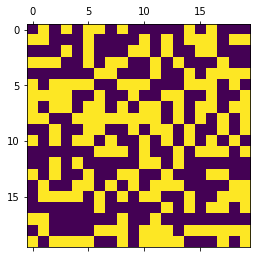

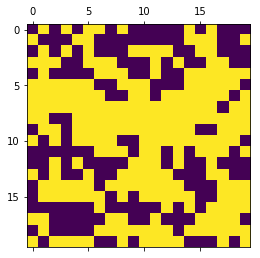

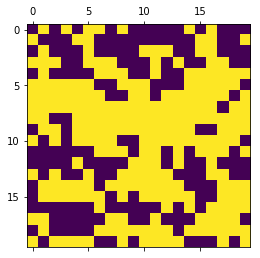

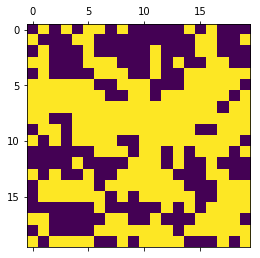

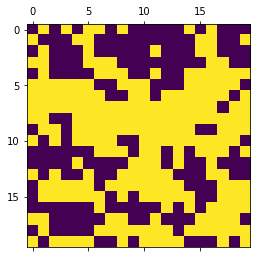

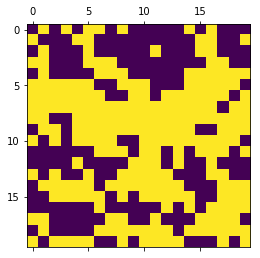

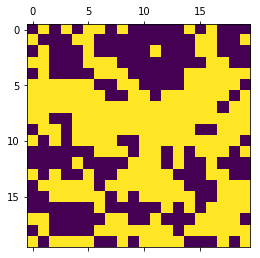

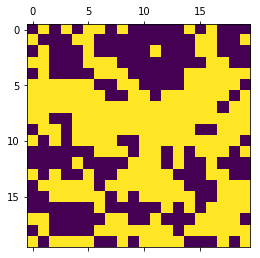

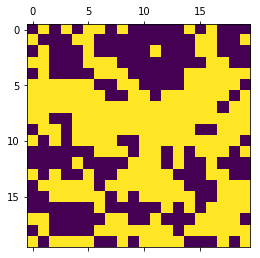

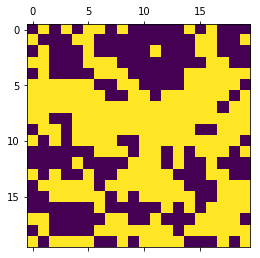

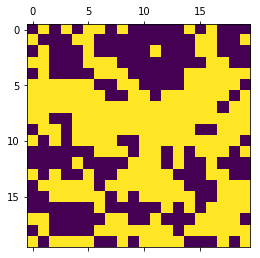

0

In [143]:
def n_generations(tab_bases,n):
    """ transformation de la ville selon les generation """
    
    ancienneV = tab_bases
    plt.matshow(ancienneV)
    
    for nb in range(0,n-1):

        demenagementDM  = posedemenagement(ancienneV)
        Ldm = Ldemande(ancienneV)
        nouvV = demenagement(demenagementDM,ancienneV,Ldm) 
        ancienneV = nouvV
        
        plt.matshow(nouvV) 
    plt.show()
    
    return 0

n_generations(tab_base,11)

***journee programme fini ***

***relier ca avec creation de gang et avec cela expliquer comment les cartier fond pour etre plus dangereux***
